### Get the dataset from Adams et al in this publication

We'll download the raw data and try getting the raw counts for patients

https://advances.sciencemag.org/content/6/28/eaba1983

It seems that GEO has raw counts and all patient data necessary

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE136831

In [1]:
from os.path import join
import scanpy as sc
import pandas as pd

In [2]:
d = '../data/adams'
mtx_path = join(d, 'GSE136831_RawCounts_Sparse.mtx.gz')
var_path = join(d, 'GSE136831_AllCells.GeneIDs.txt.gz')
obs_path = join(d, 'GSE136831_AllCells.cellBarcodes.txt.gz')
metadata_path = join(d, 'GSE136831_AllCells.Samples.CellType.MetadataTable.txt.gz')


In [ ]:
print('reading mtx...')
ad = sc.read_mtx(mtx_path, dtype='float32')

reading mtx...


In [15]:
ad

AnnData object with n_obs × n_vars = 45947 × 312928

In [41]:
print('reading obs+var...')
obs = pd.read_csv(obs_path, header=None, sep='\t')
var = pd.read_csv(var_path, sep='\t')

metadata = pd.read_csv(metadata_path, sep='\t', index_col=0)

reading obs+var...


In [23]:
# var
var.columns = ['ensembl', 'symbol']
var.index = list(var.ensembl)
# var
ad.obs = var
ad.obs

# ad.obs
# ad.var
obs.index = list(obs[0])
ad.var.index = obs.index

,ensembl,symbol
ENSG00000000003,ENSG00000000003,TSPAN6
ENSG00000000005,ENSG00000000005,TNMD
ENSG00000000419,ENSG00000000419,DPM1
ENSG00000000457,ENSG00000000457,SCYL3
ENSG00000000460,ENSG00000000460,C1orf112
...,...,...
ENSG00000227029,ENSG00000227029,ENSG00000227029
ENSG00000239708,ENSG00000239708,RN7SL782P
ENSG00000274532,ENSG00000274532,ENSG00000274532
ENSG00000277705,ENSG00000277705,ENSG00000277705


In [52]:
assert metadata.index.equals(ad.var.index)
for c in metadata:
    ad.var[c] = metadata[c]

,nUMI,nGene,CellType_Category,Manuscript_Identity,Subclass_Cell_Identity,Disease_Identity,Subject_Identity,Library_Identity
001C_AAACCTGCATCGGGTC,5477,2150,Myeloid,ncMonocyte,Monocyte_Non-Classical,Control,001C,001C
001C_AAACCTGTCAACACCA,20311,4726,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,Control,001C,001C
001C_AAACCTGTCACAGTAC,1390,881,Lymphoid,NK,NK,Control,001C,001C
001C_AAACCTGTCTGTCTAT,3968,1943,Myeloid,cMonocyte,Monocyte,Control,001C,001C
001C_AAACGGGAGACTAAGT,3036,1716,Endothelial,Lymphatic,Lymphatic-Endothelial,Control,001C,001C
...,...,...,...,...,...,...,...,...
8CO_TTGTAGGCATCACGTA,7617,2796,Lymphoid,T_Cytotoxic,T_Cytotoxic_A,COPD,8CO,8CO
8CO_TTGTAGGTCCAGATCA,3904,1811,Myeloid,cMonocyte,Monocyte,COPD,8CO,8CO
8CO_TTTATGCGTAGGCTGA,5195,2098,Endothelial,VE_Venous,Vascular-Endothelial_A,COPD,8CO,8CO
8CO_TTTGGTTTCTGCAAGT,24743,4819,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,COPD,8CO,8CO


In [ ]:
for identity in set(ad.var.CellType_Category):
    print(identity)
    sel = ad[:,ad.var.CellType_Category == identity]
    sel = sel.copy().transpose()
    print(sel.shape)
    sel.write('../data/adams/adams_input_scvi_%s.h5ad' % identity, compression='lzf')

Lymphoid


... storing 'CellType_Category' as categorical
... storing 'Manuscript_Identity' as categorical


(55543, 45947)


... storing 'Subclass_Cell_Identity' as categorical
... storing 'Disease_Identity' as categorical
... storing 'Subject_Identity' as categorical
... storing 'Library_Identity' as categorical


Myeloid
(215938, 45947)


... storing 'CellType_Category' as categorical
... storing 'Manuscript_Identity' as categorical
... storing 'Subclass_Cell_Identity' as categorical
... storing 'Disease_Identity' as categorical
... storing 'Subject_Identity' as categorical
... storing 'Library_Identity' as categorical


### Macrophages

In [ ]:
identity = 'Macrophage'
sel = ad[:,ad.var.Manuscript_Identity.str.contains(identity)]
sel = sel.copy().transpose()
print(sel.shape)
sel.write('../data/adams/adams_input_scvi_%s.h5ad' % identity, compression='lzf')

### All

In [ ]:
ad_all = ad.copy().transpose()
print(ad_all.shape)
ad_all.write('../data/adams/adams_input_scvi_all.h5ad', compression='lzf')

In [68]:
!ls -ltrh ../data/adams/

total 11G
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 2.1G May  8 20:29 GSE136831_RawCounts_Sparse.mtx.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 317K May  8 23:03 GSE136831_AllCells.GeneIDs.txt.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 4.2M May  8 23:03 GSE136831_AllCells.Samples.CellType.MetadataTable.txt.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 1.4M May  8 23:03 GSE136831_AllCells.cellBarcodes.txt.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 329M Oct 18 09:38 adams_input_scvi_Lymphoid.h5ad
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 2.4G Oct 18 09:39 adams_input_scvi_Myeloid.h5ad
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User  95M Oct 18 09:39 adams_input_scvi_Stromal.h5ad
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User  80M Oct 18 09:40 adams_input_scvi_Endothelial.h5ad
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User  85M Oct 18 09:40 adams_input_scvi_Multiplet.h5ad
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 321M Oct 18 09:40 adams_input_scvi_Epithelial.h5ad
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 3.3G 

In [3]:
import scanpy as sc
adams = sc.read_h5ad('../data/adams/adams_input_scvi_Macrophage.h5ad')

In [4]:
ad = adams

In [5]:
ad

AnnData object with n_obs × n_vars = 183552 × 45947
    obs: 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity'
    var: 'ensembl', 'symbol'

In [13]:
from os.path import join, exists
import numpy as np

In [14]:
outpath = 'data/adams/adams_input_scvi_Macrophage_scanpy_norm.h5ad'
# print(exists(outpath), outpath)
# if exists(outpath):
#     assert 1 > 2
    
# Quality control - calculate QC covariates
ad.obs['n_counts'] = ad.X.sum(1)
ad.obs['log_counts'] = np.log(ad.obs['n_counts'])
ad.obs['n_genes'] = (ad.X > 0).sum(1)
mt_gene_mask = [gene.startswith('MT-') for gene in ad.var['symbol']]
ad.obs['mt_frac'] = ad.X[:, mt_gene_mask].toarray().sum(1) / ad.obs['n_counts']
# Quality control - plot QC metrics


ad = ad[ad.X.sum(axis=1) > 1000,:]
ad = ad[ad.obs['mt_frac'] < 0.2,:]
ad = ad[ad.obs['n_genes'] > 700,:]

print('after filtering: ', ad.shape)

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


after filtering:  (179222, 45947)


### Maintain the counts 

In [21]:
print('here...')

here...


In [22]:
print('here...')

here...


In [20]:
ad.var.index = np.array(ad.var.symbol)
ad.raw = ad.copy()

In [23]:

print('normalizing...')
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e6)
sc.pp.log1p(ad)
print('pca')

sc.pp.pca(ad, n_comps=min(15, ad.shape[0] - 1))
print('pca + umap')
sc.pp.neighbors(ad)
sc.tl.louvain(ad, key_added='groups', resolution=0.5)
sc.tl.umap(ad)

normalizing...


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


pca
pca + umap


In [24]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
rcParams['figure.figsize'] = [10, 10]
rcParams['figure.dpi'] = 100

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


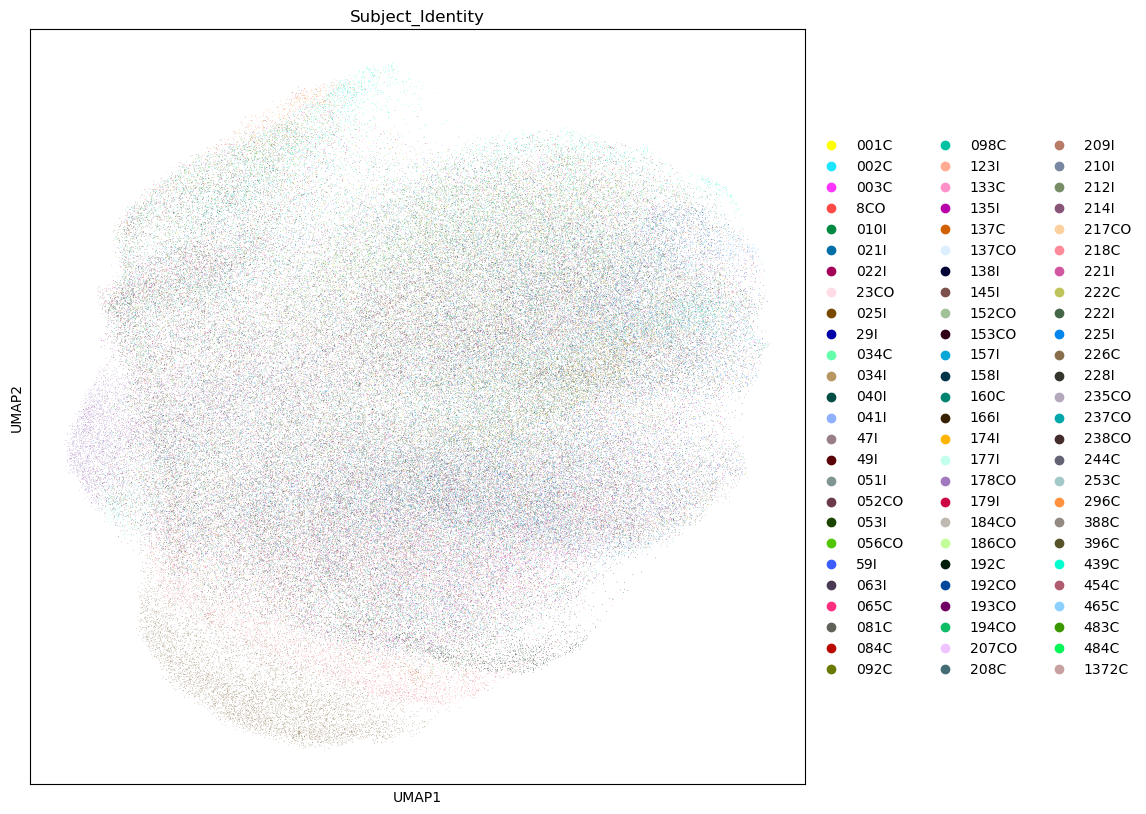

In [25]:
sc.pl.umap(ad, color='Subject_Identity')

In [26]:
print('done. Please save the object...')

done. Please save the object...


In [50]:
marker_genes = {}
marker_genes['MP.markers'] = {"TREM2", "CD9", "SPP1", "GPNMB", "LGALS3", "LGALS1", "FABP4", "FABP5", "ACP5", "PSAP",
                                 "FTH1", "LIPA", "CTSD", "CTSB", "CSTB", "CTSL", "APOE", "APOC1", "CD63", "LPL"}
marker_genes['MP.others'] = {"FTL1", "CTSC", "HEXA", "HEXB", "MMP12", "MERTK", "TYROBP", "MFGE8", "DOCK1", "ADGRB1", "IL7R"}
print(marker_genes)

for k in marker_genes:
    marker_genes[k] = marker_genes[k].intersection(set(ad.var.symbol))
    print(k, len(marker_genes[k]))

{'MP.markers': {'LGALS1', 'PSAP', 'FTH1', 'TREM2', 'SPP1', 'APOC1', 'APOE', 'GPNMB', 'FABP5', 'LGALS3', 'FABP4', 'CD9', 'ACP5', 'CSTB', 'LPL', 'LIPA', 'CTSL', 'CTSB', 'CTSD', 'CD63'}, 'MP.others': {'MERTK', 'MFGE8', 'MMP12', 'IL7R', 'CTSC', 'ADGRB1', 'DOCK1', 'HEXB', 'FTL1', 'HEXA', 'TYROBP'}}
MP.markers 20
MP.others 9


In [51]:
for k in ['MP.markers', 'MP.others']:
    next_marker_genes = marker_genes[k]
    sc.tl.score_genes(ad, next_marker_genes, use_raw=False, score_name=k + ".score")

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [52]:
ad.obs

,nUMI,nGene,CellType_Category,Manuscript_Identity,Subclass_Cell_Identity,Disease_Identity,Subject_Identity,Library_Identity,n_counts,log_counts,n_genes,mt_frac,groups,MP.markers.score,MP.others.score
001C_AAACCTGTCAACACCA,20311,4726,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,Control,001C,001C,20311.0,9.918918,4726,0.042834,1,3.544531,1.700245
001C_AAACGGGAGGCTCATT,4514,1936,Myeloid,Macrophage,Macrophage,Control,001C,001C,4514.0,8.414939,1936,0.067125,2,3.762059,1.562046
001C_AAACGGGGTATAATGG,7569,2890,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,Control,001C,001C,7569.0,8.931816,2890,0.097767,3,2.524176,0.909474
001C_AAACGGGGTTTAGGAA,5755,2760,Myeloid,Macrophage,Macrophage_CellCycle_B,Control,001C,001C,5755.0,8.657825,2760,0.162467,4,-0.015420,1.949882
001C_AAACGGGTCACAAACC,6961,2676,Myeloid,Macrophage,Macrophage_Outlier_HSPs,Control,001C,001C,6961.0,8.848079,2676,0.039506,0,4.106443,1.938062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8CO_TTAACTCTCCGTACAA,16924,4774,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,COPD,8CO,8CO,16924.0,9.736488,4774,0.056311,1,2.755213,1.037444
8CO_TTCGGTCGTATGCTTG,15977,3871,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,COPD,8CO,8CO,15977.0,9.678905,3871,0.055893,1,2.549399,0.746745
8CO_TTCTTAGAGGCGCTCT,36371,6916,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,COPD,8CO,8CO,36371.0,10.501527,6916,0.044266,1,3.238561,0.538023
8CO_TTGGAACTCGACAGCC,16264,3800,Myeloid,Macrophage_Alveolar,Macrophage_Alveolar,COPD,8CO,8CO,16264.0,9.696710,3800,0.076795,1,3.700383,1.357073


0 Macrophage


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


1 Macrophage_Alveolar


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


2 Macrophage_Outlier_B
3 Macrophage_Outlier_C


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


4 Macrophage_MT-tRNAs
5 Macrophage_Outlier_F


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


6 Macrophage_Outlier_A
7 Macrophage_Alveolar_CellCycle_A


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


8 Macrophage_Alveolar_CellCycle_B
9 Macrophage_CellCycle_B


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


10 Macrophage_Alveolar_Outlier_B
11 Macrophage_Outlier_HSPs


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


12 Macrophage_Outlier_D
13 Macrophage_Alveolar_Outlier_A


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


14 Macrophage_CellCycle_A


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


15 Macrophage_Alveolar_Outlier_D
16 Macrophage_Alveolar_Outlier_C


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


17 Macrophage_Outlier_E
18 Macrophage_Alveolar_Outlier_E


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


19 Macrophage_Alveolar_Outlier_F
20 Macrophage_CellCycle_MT-tRNAs


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


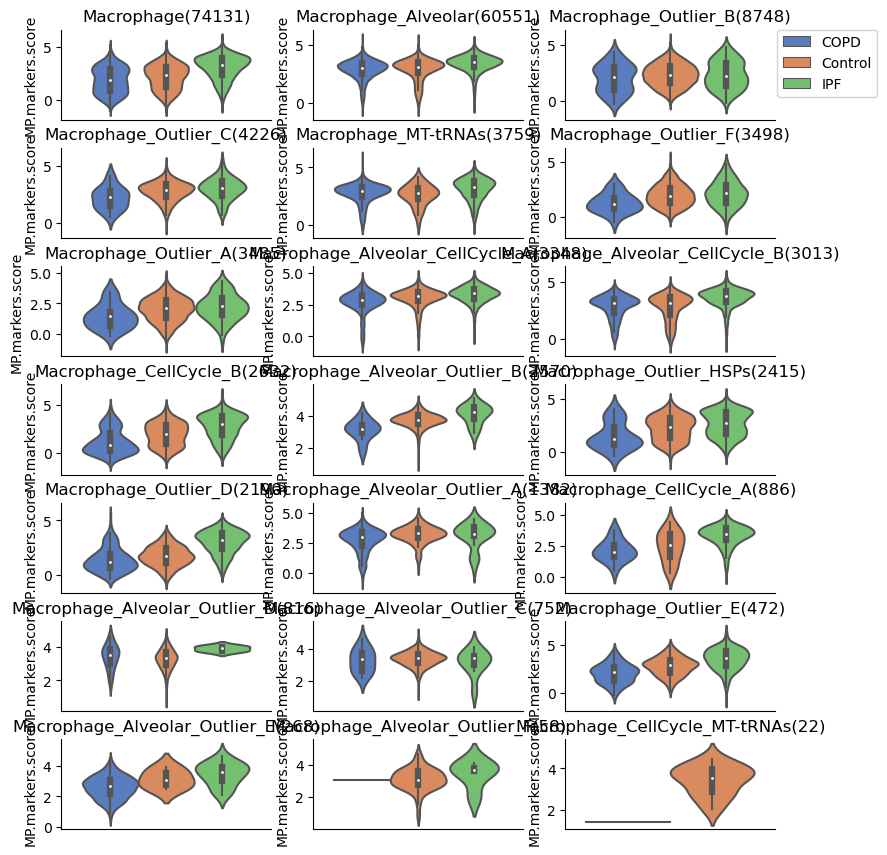

In [54]:

pi = 0
for ct in sorted(set(ad.obs['Subclass_Cell_Identity']), key=lambda x: ad.obs[ad.obs['Subclass_Cell_Identity'] == x].shape[0])[::-1]:
    print(pi, ct)
    
    grp = ad[ad.obs['Subclass_Cell_Identity'] == ct].obs
    
    ax = plt.subplot(10, 3, pi + 1)
    sns.violinplot(x="Subclass_Cell_Identity", y="MP.markers.score", hue='Disease_Identity',
                   data=grp, palette="muted")
    plt.title(ct + '(%i)' % grp.shape[0])
    
    if pi != 2:
        ax.get_legend().set_visible(False)
    else:
        plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    pi += 1
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    plt.xlabel('')
    plt.xticks([])

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(right=.6, bottom=.3)

In [27]:
ad.var.index = np.array(ad.var.index)

In [28]:
outpath

'data/adams/adams_input_scvi_Macrophage_scanpy_norm.h5ad'

In [30]:
ad.raw

In [29]:
ad.write(outpath, compression='lzf')